In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
data_df = pd.read_csv('../data/diabetes.csv')
data_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
FEAT_COLS = data_df.columns.tolist()[:-1]
FEAT_COLS

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

Text(0.5,1,'S6')

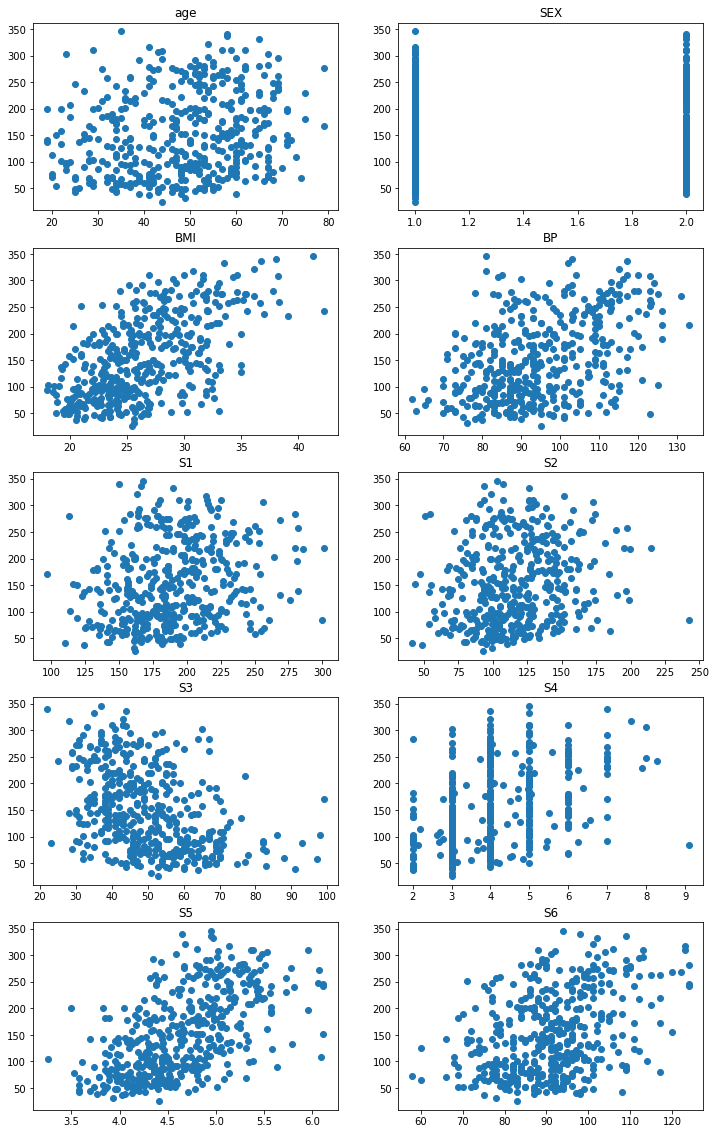

In [46]:
fig, axes = plt.subplots(5,2,figsize=(12,20))

axes[0,0].scatter(x=data_df['AGE'], y=data_df['Y'])
axes[0,1].scatter(x=data_df['SEX'], y=data_df['Y'])
axes[1,0].scatter(x=data_df['BMI'], y=data_df['Y'])
axes[1,1].scatter(x=data_df['BP'], y=data_df['Y'])
axes[2,0].scatter(x=data_df['S1'], y=data_df['Y'])
axes[2,1].scatter(x=data_df['S2'], y=data_df['Y'])
axes[3,0].scatter(x=data_df['S3'], y=data_df['Y'])
axes[3,1].scatter(x=data_df['S4'], y=data_df['Y'])
axes[4,0].scatter(x=data_df['S5'], y=data_df['Y'])
axes[4,1].scatter(x=data_df['S6'], y=data_df['Y'])

axes[0,0].set_title('age')
axes[0,1].set_title('SEX')
axes[1,0].set_title('BMI')
axes[1,1].set_title('BP')
axes[2,0].set_title('S1')
axes[2,1].set_title('S2')
axes[3,0].set_title('S3')
axes[3,1].set_title('S4')
axes[4,0].set_title('S5')
axes[4,1].set_title('S6')

AGE  -> r2 =  0.036704593970183774


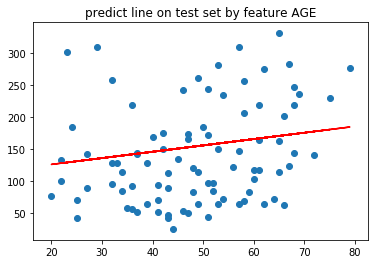

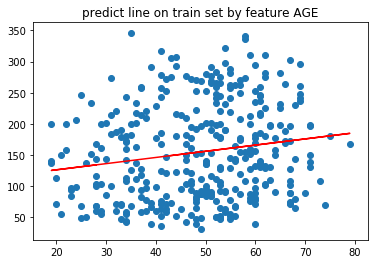

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

SEX  -> r2 =  -0.0226264329959478


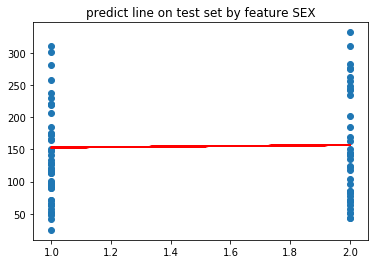

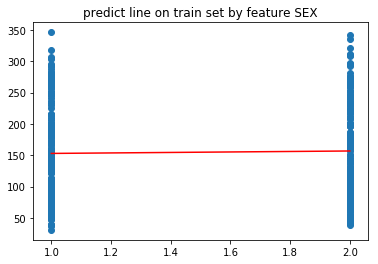

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

BMI  -> r2 =  0.21847731902398204


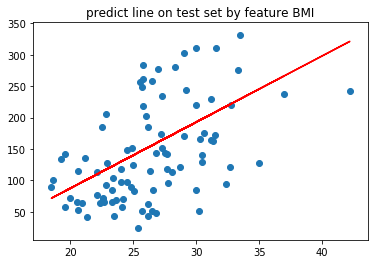

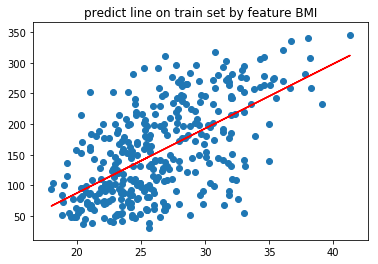

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

BP  -> r2 =  0.1407726363788091


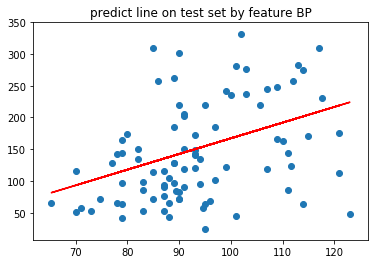

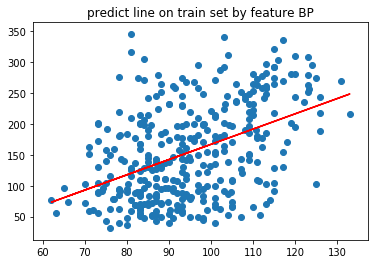

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

S1  -> r2 =  0.011617351750561222


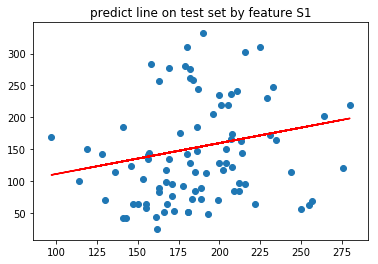

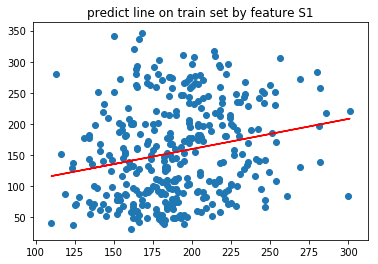

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

S2  -> r2 =  -0.007472848233761598


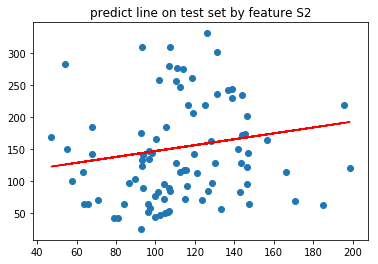

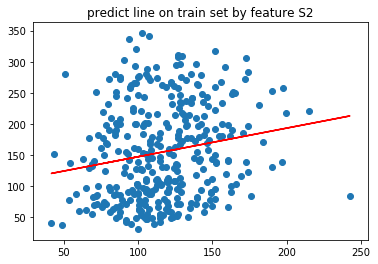

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

S3  -> r2 =  0.14760059529586977


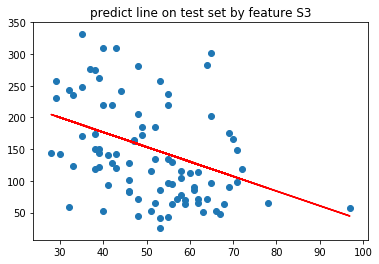

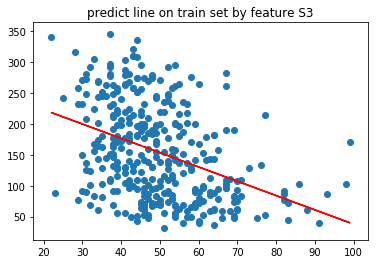

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

S4  -> r2 =  0.21588545738828724


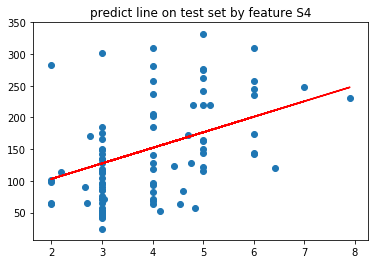

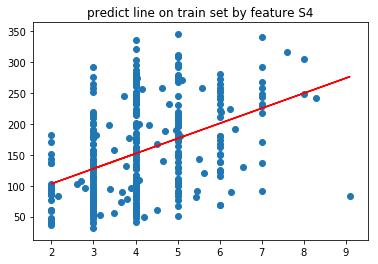

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

S5  -> r2 =  0.3515587877478441


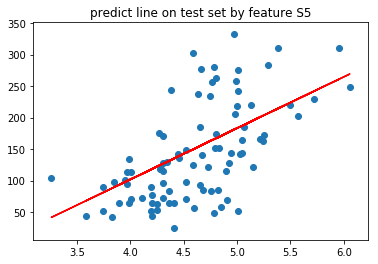

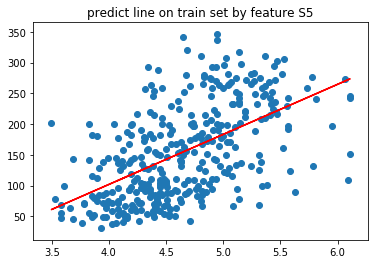

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 

S6  -> r2 =  0.16991832756916592


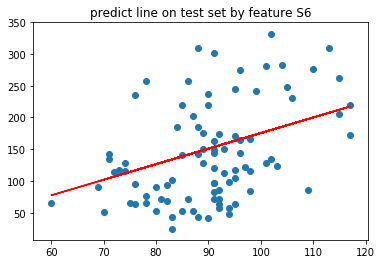

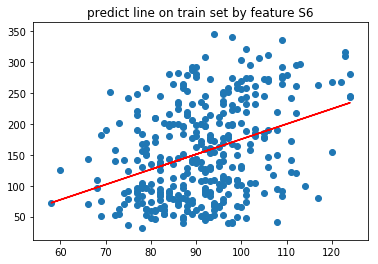

-*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*--*-=-*- 



In [53]:
def plot_on_test(lr_model,X_test,y_test,feat):
    """y = w * x + b"""
    w = lr_model.coef_
    b = lr_model.intercept_
    plt.plot(X_test, w*X_test+b, c='r')
    plt.scatter(X_test,y_test)
    plt.title('predict line on test set by feature {}'.format(feat))
    plt.show()

def plot_on_train(lr_model,X_train,y_train,feat):
    w = lr_model.coef_
    b = lr_model.intercept_
    plt.plot(X_train, w*X_train+b, c='r')
    plt.scatter(X_train,y_train)
    plt.title('predict line on train set by feature {}'.format(feat))
    plt.show()

    
for feat in FEAT_COLS:
    X = data_df[feat].values.reshape(-1,1)
    y = data_df['Y'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/5,random_state=20)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    r2 = lr_model.score(X_test,y_test)
    print(feat, ' -> r2 = ', r2)
    plot_on_test(lr_model,X_test,y_test,feat)
    plot_on_train(lr_model,X_train,y_train,feat)
    print('-*-=-*-'*10,'\n')